# Integrals on the grid 

When analysing meshes, integrals always become sums over indices.

$\int$ -> $\sum$


## Exercise:

Let's compute some integrated quantities from a 3D wind-cloud simulation, which you can find in Google Drive:

https://drive.google.com/drive/folders/13H5bGBQh5UKo2U519praAXAUiYYrugb6?usp=sharing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

#### 1. Read mesh:

In [3]:
mesh = pv.read("/Users/webb/Dropbox/Yachay_Tech/Docencia/Fisica_Computacional/Wind-Cloud-MHD-Al/data.0000.vtk")

#### 2. Check mesh contents:

In [4]:
print(mesh)

RectilinearGrid (0x12483c1a0)
  N Cells:	1769472
  N Points:	1815937
  X Bounds:	-6.000e+00, 6.000e+00
  Y Bounds:	-2.000e+00, 2.200e+01
  Z Bounds:	-6.000e+00, 6.000e+00
  Dimensions:	97, 193, 97
  N Arrays:	9



In [5]:
print(mesh.dimensions)

(97, 193, 97)


In [6]:
print(mesh.n_cells)

1769472


In [7]:
print(mesh.n_arrays)

9


In [8]:
print(mesh.center)

[0.0, 10.0, 0.0]


#### 3. Check mesh arrays:

In [9]:
print(mesh.cell_data)

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : rho
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    rho                     float32  (1769472,)           SCALARS
    vx1                     float32  (1769472,)
    vx2                     float32  (1769472,)
    vx3                     float32  (1769472,)
    Bx1                     float32  (1769472,)
    Bx2                     float32  (1769472,)
    Bx3                     float32  (1769472,)
    prs                     float32  (1769472,)
    tr1                     float32  (1769472,)


#### 4. Read the density and pigment arrays:

In [10]:
# Density
rho = pv.get_array(mesh, "rho", preference = "cell")

# Pigment
tr1 = pv.get_array(mesh, "tr1", preference = "cell")

In [11]:
print(rho.shape)

(1769472,)


In [12]:
print(mesh.dimensions[2] - 1)

96


#### 5. Convert arrays from 1D to 3D:

In [13]:
print(mesh.dimensions)

(97, 193, 97)


In [14]:
rho3D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)

tr13D = tr1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)

In [15]:
print(rho3D.shape)

(96, 192, 96)


#### 6. Slice 3D data:

In [16]:
rho2D_48 = rho3D[48, :, :]
tr12D_48 = tr13D[48, :, :]

In [17]:
print(rho2D_48.shape)

(192, 96)


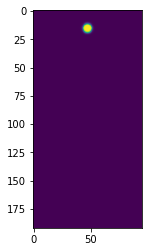

In [18]:
# Python reverses the axes:

%matplotlib inline

plt.imshow(rho2D_48)

#### 7. Create coordinate vectors for mesh grid

In [19]:
# Print mesh bounds:

print(mesh.bounds[0])
print(mesh.bounds[1])
print(mesh.bounds[2])
print(mesh.bounds[3])
print(mesh.bounds[4])
print(mesh.bounds[5])

-6.0
6.0
-2.0
22.0
-6.0
6.0


In [20]:
# Get coordinates - first manner:
x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)
z = np.linspace(mesh.bounds[4], mesh.bounds[5], mesh.dimensions[2] - 1)

# Get coordinates - second manner:
xx = np.linspace(mesh.bounds[0], mesh.bounds[1], (mesh.dimensions[0]))
yy = np.linspace(mesh.bounds[2], mesh.bounds[3], (mesh.dimensions[1]))
zz = np.linspace(mesh.bounds[4], mesh.bounds[5], (mesh.dimensions[2]))

In [21]:
# Get dx, dy, dz

dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]

print(dx, dy, dz)

# We can see below that this results in a non-evenly spaced grid

0.1263157894736846 0.12565445026178002 0.1263157894736846


In [22]:
# Get dx, dy, dz

dxx = xx[1] - xx[0]
dyy = yy[1] - yy[0]
dzz = zz[1] - zz[0]

print(dxx, dyy, dzz)

# We can see below that this results in an evenly spaced grid

0.125 0.125 0.125


#### 8. Create mesh grid:

In [23]:
X, Y = np.meshgrid(xx, yy)

In [24]:
print(X.shape)
print(Y.shape)

(193, 97)
(193, 97)


#### 9. Plot mid-plane slice:

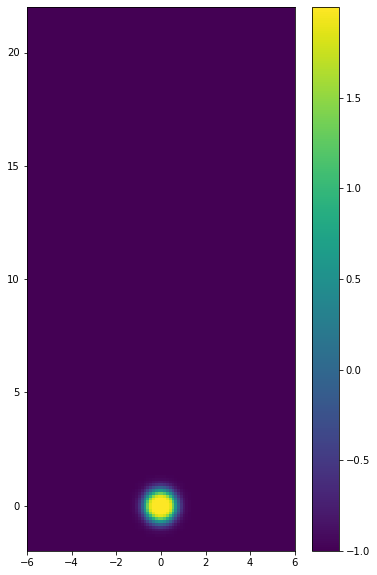

In [25]:
plt.figure(figsize = (6, 10))

Z = plt.pcolor(X, Y, np.log10(rho2D_48), shading='auto')

plt.colorbar(Z)

plt.show()

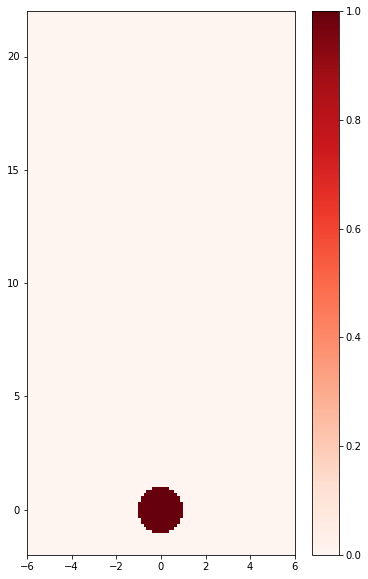

In [26]:
plt.figure(figsize = (6, 10))

Z = plt.pcolor(X, Y, tr12D_48, shading='auto', cmap = 'Reds')

plt.colorbar(Z)

plt.show()

#### 9. Plot first-plane slice:

In [27]:
rho2D_00 = rho3D[0, :, :]
tr12D_00 = tr13D[0, :, :]

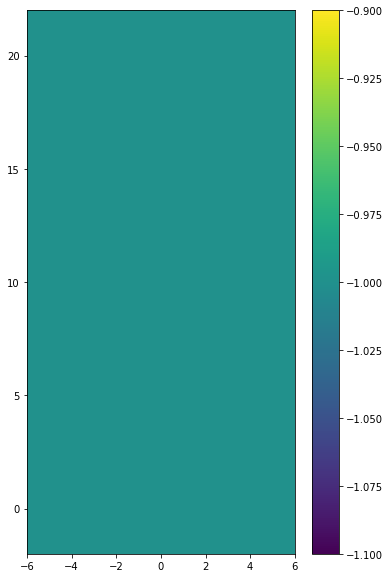

In [28]:
plt.figure(figsize = (6, 10))

Z = plt.pcolor(X, Y, np.log10(rho2D_00), shading='auto')

plt.colorbar(Z)

plt.show()

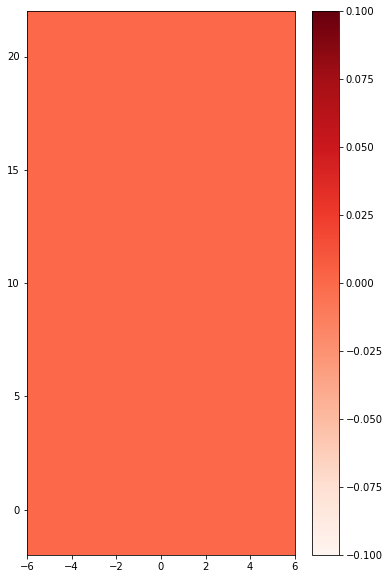

In [29]:
plt.figure(figsize = (6, 10))

Z = plt.pcolor(X, Y, tr12D_00, shading='auto', cmap = 'Reds')

plt.colorbar(Z)

plt.show()

## Integrated quantities

### Example 1:

Compute the mass:

$M = \int\int\int \rho\,dV = \sum_i \sum_j \sum_k \rho_{i,j,k}\Delta V_{i,j,k}$

The grid is uniform:

$M = \int\int\int \rho\,dV = \Delta V\,\sum_i \sum_j \sum_k \rho_{i,j,k}$

$M = \Delta x^3\,\sum_i \sum_j \sum_k \rho_{i,j,k}$

In [30]:
# Delta x

print(dxx, dyy, dzz)

0.125 0.125 0.125


In [31]:
# mass - first manner

total_mass = np.sum(rho3D)*dxx**3

In [32]:
print(total_mass)

406.5387878417969


In [33]:
# mass - second manner

total_mass1 = (dxx**3)*np.sum(np.sum(np.sum(rho3D, axis = 2), axis =1), axis = 0)

In [34]:
print(total_mass1)

406.53814697265625


### Example 2:

Compute the column density and plot the map:

$\rho_A = \int \rho\,dy = \sum_j \rho_{i,j,k}\Delta y$

The grid is uniform:

$\rho_A = \Delta y\, \sum_j \rho_{i,j,k}$

In [35]:
# Projected 2D density:

rho_A = dyy*np.sum(rho3D, axis = 1)

In [36]:
print(rho_A.shape)

(96, 96)


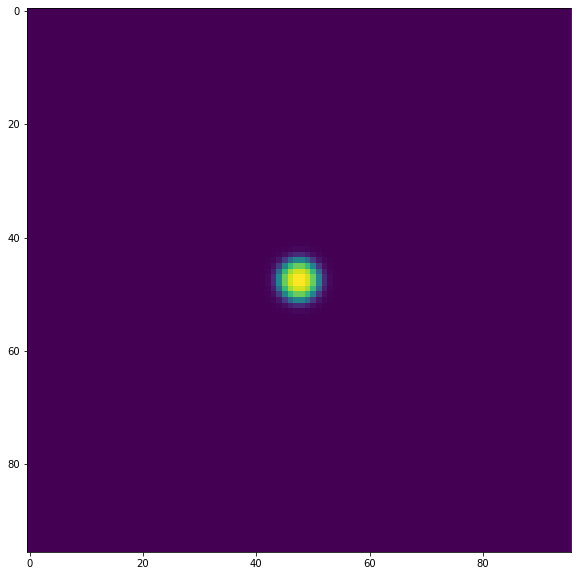

In [37]:
# Plotting the map:

#plt.imshow(rho_A)

plt.figure(figsize = (10, 10))

plt.imshow(rho_A)

plt.show()

### Example 3:

Compute the linear density and plot it:

$\rho_l = \int \rho\,dy\,dz$

In [38]:
# Projected linear density:

rho_l = dyy**2*np.sum(np.sum(rho3D, axis = 1), axis = 0)

In [39]:
print(rho_l.shape)

(96,)


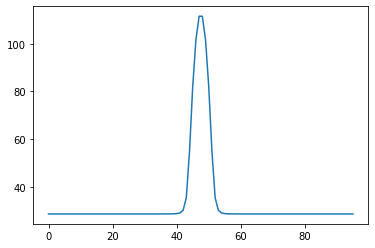

In [40]:
# Linear density plot:

plt.plot(rho_l)

### Example 4:  Centre of mass

Compute the centre of mass considering all the gas in the computational domain:


$cm_x = \frac{\int \rho\,x\,dV}{\int \rho\,dV}$

$cm_y = \frac{\int \rho\,y\,dV}{\int \rho\,dV}$

$cm_z = \frac{\int \rho\,z\,dV}{\int \rho\,dV}$


In [41]:
cmx = np.sum(np.sum(np.sum(rho3D,axis=2),axis=1)*(x))/np.sum(rho3D) 

cmy = np.sum(np.sum(np.sum(rho3D,axis=2),axis=0)*(y))/np.sum(rho3D) 

cmz = np.sum(np.sum(np.sum(rho3D,axis=1),axis=0)*(z))/np.sum(rho3D) 

In [42]:
print(cmx, cmy, cmz)

1.7477858374404495e-16 8.493178390076352 2.4469001724166293e-16


### Example 5:  Cloud centre of mass

Compute the cloud's centre of mass considering only cloud gas in the computational domain:

**Hint:** Remember that cloud gas is tracked by a pigment (array tr1).


$cm_x = \frac{\int \rho\, C\,x\,dV}{\int \rho\,C\,dV}$

$cm_y = \frac{\int \rho\, C\,y\,dV}{\int \rho\,C\,dV}$

$cm_z = \frac{\int \rho\, C\,z\,dV}{\int \rho\,C\,dV}$


In [43]:
x_mid = 0.5*(xx[1:] + xx[:-1])
y_mid = 0.5*(yy[1:] + yy[:-1])
z_mid = 0.5*(zz[1:] + zz[:-1])

#### Using x, y, z, we get a small deviation from zero at t=0:

In [44]:
#Centre of mass - first

cmx_c = np.sum(np.sum(np.sum(rho3D*tr13D,axis=2),axis=1)*(x))/np.sum(rho3D*tr13D)
cmy_c = np.sum(np.sum(np.sum(rho3D*tr13D,axis=2),axis=0)*(y))/np.sum(rho3D*tr13D)
cmz_c = np.sum(np.sum(np.sum(rho3D*tr13D,axis=1),axis=0)*(z))/np.sum(rho3D*tr13D) 

In [45]:
print(cmx_c, cmy_c, cmz_c)

1.886633608487478e-16 -0.05235602422811987 1.7415079462961335e-16


#### Using x, y, z, we get the correct position at t=0:

In [46]:
#Centre of mass - second

cmx_c2 = np.sum(np.sum(np.sum(rho3D*tr13D,axis=2),axis=1)*(x_mid))/np.sum(rho3D*tr13D)
cmy_c2 = np.sum(np.sum(np.sum(rho3D*tr13D,axis=2),axis=0)*(y_mid))/np.sum(rho3D*tr13D)
cmz_c2 = np.sum(np.sum(np.sum(rho3D*tr13D,axis=1),axis=0)*(z_mid))/np.sum(rho3D*tr13D) 

In [47]:
print(cmx_c2, cmy_c2, cmz_c2)

0.0 0.0 0.0


### Centre of mass of the rho2D_48 slice

In [59]:
print(rho2D_48.shape)
print(tr12D_48.shape)
print(x_mid.shape)

(192, 96)
(192, 96)
(96,)


In [60]:
cx_2D = np.sum(np.sum(rho2D_48*tr12D_48,axis=0)*(x_mid))/np.sum(rho2D_48*tr12D_48)
cy_2D = np.sum(np.sum(rho2D_48*tr12D_48,axis=1)*(y_mid))/np.sum(rho2D_48*tr12D_48)

In [61]:
print(cx_2D, cy_2D)

0.0 0.0
